## TDM

corpus = ['you know I want your love',
          'I like you',
          'what should I do']

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love',
          'I like you',
          'what should I do']

vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 단어의 빈도 수 기록
print(vector.vocabulary_)  # 각 단어의 인덱스확인

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [7]:
# 폭염 데이터 이용
import pandas as pd

df = pd.read_csv("폭염.csv", sep = ',', quotechar = '"',
                 error_bad_lines = False, encoding = 'utf-8')
df.head()

b'Skipping line 15: expected 18 fields, saw 19\nSkipping line 71: expected 18 fields, saw 19\nSkipping line 74: expected 18 fields, saw 19\nSkipping line 79: expected 18 fields, saw 19\nSkipping line 94: expected 18 fields, saw 19\nSkipping line 110: expected 18 fields, saw 19\nSkipping line 118: expected 18 fields, saw 19\nSkipping line 120: expected 18 fields, saw 19\nSkipping line 130: expected 18 fields, saw 19\nSkipping line 137: expected 18 fields, saw 19\nSkipping line 159: expected 18 fields, saw 19\nSkipping line 168: expected 18 fields, saw 19\nSkipping line 174: expected 18 fields, saw 19\nSkipping line 190: expected 18 fields, saw 20\nSkipping line 194: expected 18 fields, saw 19\nSkipping line 210: expected 18 fields, saw 21\nSkipping line 214: expected 18 fields, saw 20\nSkipping line 222: expected 18 fields, saw 19\nSkipping line 237: expected 18 fields, saw 19\nSkipping line 245: expected 18 fields, saw 20\nSkipping line 260: expected 18 fields, saw 19\nSkipping line 26

,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,개체명(인물),개체명(지역),개체명(기업/기관),키워드,특성추출,본문,원본주소
0,http://www.bigkinds.or.kr/news/newsDetailView....,20180724,헤럴드경제,김유진 기자,[펄펄 끓는 한반도] 최고기온 40도 시간문제…,사회>날씨,NaN,NaN,NaN,NaN,NaN,NaN,"경북, 경북 경산, 경상북도, 금락리, 대구, 북태평양, 신녕면, 하양읍, 한반도,...","경산시, 경주, 기상청, 대구, 영천시, 한반도","시간문제,최고기온,경북,경산,8월,기록,대구,7말,열축적,가속,7말,더위,절정,열흘...","가능성,40도,기상청,대구,최고기온,고기압,경상북도,열축적,경북,시간문제,북태평양,...",23일 경북 경산 39.9도까지 치솟아 1942년 8월1일 대구 40.0도 기..열...,http://biz.heraldcorp.com/view.php?ud=20180724...
1,http://www.bigkinds.or.kr/news/newsDetailView....,20180724,헤럴드경제,박로명 기자,붙이는 네일·인스턴트 타투…폭염에도 ‘반짝 뷰티템’ 인기,경제>유통,경제>서비스_쇼핑,경제>산업_기업,NaN,NaN,NaN,롭스,인디아,"H&B, 네일아트, 데싱디바, 롭스, 롯데, 헬스앤뷰티","네일,인스턴트,타투,폭염,뷰티템,인기,롭스,네일,염모제,매출,52%·31%,양보,전...","롭스,2주,휴가철,올리브영,염모제,타투스티커,연평균,네일숍,데싱디바,120ml,5만...","롭스, 네일·염모제 매출 각각 52%·31% ↑ “아무리 더워도 아름다움 양보 못해...",http://biz.heraldcorp.com/view.php?ud=20180724...
2,http://www.bigkinds.or.kr/news/newsDetailView....,20180724,서울경제,김도건 기자,"천기누설! ‘수익의 법칙’ 업종별 순환매를 알았다면….제약바이오, 경협, 전기차 상관관계",경제>증권_증시,경제>산업_기업,경제>금융_재테크,NaN,NaN,NaN,NaN,"대장주, 서울경, 수혜주","제약바이오, 제천대성, 중국, 창성바이오","천기누설,수익,법칙,업종별,순환매,제약바이오,경협,전기차,상관관계,중국,창성,바이오...","톡스타,순환매,제약바이오,전기차,경협주,전문가,서울경제,중국,설리,가능성,전문가들,...",중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....,http://www.sedaily.com/NewsView/1S27K8I4H4
3,http://www.bigkinds.or.kr/news/newsDetailView....,20180724,서울경제,김도건 기자,"천기누설! ‘수익의 법칙’ 업종별 순환매를 알았다면….제약바이오, 경협, 전기차 상관관계",경제>증권_증시,경제>산업_기업,경제>금융_재테크,NaN,NaN,NaN,NaN,"대장주, 서울경, 수혜주","제약바이오, 제천대성, 중국, 창성바이오","천기누설,수익,법칙,업종별,순환매,제약바이오,경협,전기차,상관관계,중국,창성,바이오...","톡스타,순환매,제약바이오,전기차,경협주,전문가,서울경제,중국,설리,가능성,전문가들,...",중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....,http://www.sedaily.com/NewsView/1S27KI9O3X
4,http://www.bigkinds.or.kr/news/newsDetailView....,20180724,파이낸셜뉴스,파이낸셜뉴스,[fn사설] 탄소 배출 후진국으로 추락한 한국,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"한반도, 독일, 고위도, 캐나다, 미국, 스웨덴, 일본, 수정안, 한국","환경부, 미국, OECD, 지난해, 글로벌, 서울, 회원국, 경제협력개발기구, 행정부","후진국,탄소,배출,추락,한국,OECD,주요국,역행,탈원전,상황,악화,우리나라,이산화...","온실가스,배출량,탈원전,한국,oecd,미국,사망자,온난화,발전량,후진국,8차,서울,...",OECD 주요국과 역행.. 탈원전이 상황 악화시켜 지난해 우리나라 이산화...,http://www.fnnews.com/news/201807231714237258


In [8]:
df.shape

(4924, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4924 entries, 0 to 4923
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   주소          4924 non-null   object
 1   일자          4924 non-null   int64 
 2   언론사         4924 non-null   object
 3   기고자         4227 non-null   object
 4   제목          4924 non-null   object
 5   통합 분류1      4727 non-null   object
 6   통합 분류2      3001 non-null   object
 7   통합 분류3      1620 non-null   object
 8   사건/사고 분류1   1898 non-null   object
 9   사건/사고 분류2   402 non-null    object
 10  사건/사고 분류3   75 non-null     object
 11  개체명(인물)     2056 non-null   object
 12  개체명(지역)     4217 non-null   object
 13  개체명(기업/기관)  4537 non-null   object
 14  키워드         4924 non-null   object
 15  특성추출        4924 non-null   object
 16  본문          4924 non-null   object
 17  원본주소        4697 non-null   object
dtypes: int64(1), object(17)
memory usage: 692.6+ KB


In [10]:
df.columns

Index(['주소', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '개체명(인물)', '개체명(지역)',
       '개체명(기업/기관)', '키워드', '특성추출', '본문', '원본주소'],
      dtype='object')

In [11]:
df['본문'].head()

0    23일 경북 경산 39.9도까지 치솟아 1942년 8월1일 대구 40.0도 기..열...
1    롭스, 네일·염모제 매출 각각 52%·31% ↑ “아무리 더워도 아름다움 양보 못해...
2    중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....
3    중국의 창성바이오가 가짜백신으로 상장폐지 위기. 국내 제약바이오주들도 덩달아 급락....
4    OECD 주요국과 역행.. 탈원전이 상황 악화시켜       지난해 우리나라 이산화...
Name: 본문, dtype: object

In [14]:
from konlpy.tag import Okt
okt = Okt()

In [15]:
okt.nouns('아침에 해를 보며 버스를 탔다') # 명사 추출 함수 확인

['아침', '해', '버스']

In [16]:
import re

In [17]:
def get_nouns(text):
  nouns = okt.nouns(text)
  nouns = [word for word in nouns if len(word) > 1]
  nouns = [word for word in nouns if not re.match(r'\d+', word)]
  return nouns

In [18]:
get_nouns('아침에 해를 보며 버스를 탔다')

['아침', '버스']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(max_features=1000, tokenizer=get_nouns)

In [21]:
tdm = cv.fit_transform(df['본문'])

In [22]:
words = cv.get_feature_names()

In [23]:
words[:10] # 첫 10단어

['가격', '가구', '가까이', '가끔', '가능성', '가동', '가두리', '가량', '가마솥', '가뭄']

In [ ]:
cv.vocabulary_ #단어와 인덱스

In [25]:
cv.vocabulary_['가격']

0

In [28]:
doc = tdm[0].toarray()
doc

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [30]:
count = tdm.sum(axis=0) # 열 방향으로 사용 단어들의 합
print(count)

[[  124    85    53    31   247   184    28    70    65   177   751   217
     40   164    77    27   256    35    28    66    29    48    69    29
     32    49   104    30   109    70    60    28   104    46    33    58
     35    32    44   102    28    54    81    44   117   422    34   164
     66    72   105    50   190   138   129   125   259   213    34    83
    193   150    85    65    32    63  1186    43   311   183    90    48
     30    34    41    37    79    32    45   159    40    62   142    39
     48    47   175    66   143    57    28    42    37    82    29    72
    147   216   607    95    83    76   174    45    29    59   202    54
     38    32    28    29    74    33    76    35    31    28    29    34
     46    52    77   144    36    72    67   103    40    44    35   147
     29    39    30   163   100    43    33   248   210    91    42    43
    834    82    33   334    34   132    68   289    82   970  1140   104
     29    47   195    80    75    32 

In [31]:
import pandas as pd

In [32]:
word_count = pd.DataFrame(
    {'단어' : cv.get_feature_names(),
     '빈도' : count.flat})

In [33]:
word_count.tail()

,단어,빈도
995,효과,65
996,훈련,36
997,휴가,301
998,휴식,111
999,휴일,36


In [35]:
sorted_df = word_count.sort_values('빈도', ascending=False)  # 내림차순 정렬
sorted_df.head(10)

,단어,빈도
928,폭염,10685
935,피해,1352
66,계속,1186
830,지역,1176
154,기자,1140
153,기온,970
577,연일,968
452,서울,936
642,위해,881
234,더위,861


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_

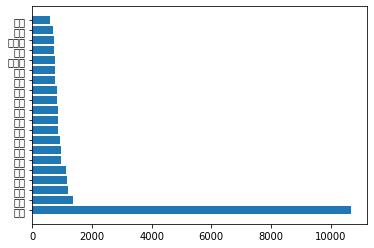

In [41]:
import matplotlib.pyplot as plt


plt.barh(sorted_df.head(20)["단어"], sorted_df.head(20)["빈도"])
plt.show()

## TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ['you know I want your love',
          'I like you',
          'what should I do']

tfidfv = TfidfVectorizer()

print(tfidfv.fit_transform(corpus).toarray())
print(tfidfv.vocabulary_)  

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


## < 과제 >
- 폭염 관련 뉴스 메타데이터 TF-IDF 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [43]:
tv = TfidfVectorizer(max_features=1000, tokenizer=get_nouns)

In [44]:
tfidf = tv.fit_transform(df['본문'])

In [45]:
words = tv.get_feature_names()

In [46]:
tv.vocabulary_ #단어와 인덱스

{'경북': 57,
 '경산': 58,
 '대구': 214,
 '열흘': 586,
 '전국': 735,
 '올해': 610,
 '불볕': 396,
 '더위': 234,
 '우리나라': 624,
 '최고': 873,
 '폭염': 928,
 '기록': 144,
 '주목': 790,
 '역대': 571,
 '기상청': 147,
 '계속': 66,
 '기온': 153,
 '중순': 811,
 '관측': 100,
 '매출': 280,
 '각각': 17,
 '지속': 827,
 '가운데': 10,
 '본격': 369,
 '여름': 563,
 '휴가': 997,
 '시작': 509,
 '상품': 439,
 '인기': 680,
 '바캉스': 316,
 '기간': 140,
 '중국': 807,
 '바이오': 315,
 '위기': 636,
 '국내': 122,
 '급락': 138,
 '이번': 666,
 '경협주': 64,
 '급등': 137,
 '전문가': 744,
 '자리': 704,
 '가능성': 4,
 '전기차': 738,
 '모두': 290,
 '정리': 759,
 '상태': 438,
 '라며': 258,
 '스타': 498,
 '무료': 298,
 '이벤트': 667,
 '통해': 910,
 '종목': 786,
 '원전': 634,
 '상황': 440,
 '지난해': 822,
 '협력': 972,
 '회원': 992,
 '조사': 778,
 '에너지': 559,
 '기업': 152,
 '최근': 874,
 '발표': 324,
 '세계': 468,
 '서울': 452,
 '한낮': 945,
 '한반도': 946,
 '유례': 646,
 '장관': 717,
 '활동': 987,
 '국회': 125,
 '주요': 794,
 '위원회': 640,
 '전체': 750,
 '회의': 993,
 '현안': 966,
 '산업': 426,
 '통상': 906,
 '업무': 557,
 '보고': 358,
 '연일': 577,
 '관련': 97,
 '전력': 742,
 '공급': 82,

In [47]:
doc = tfidf[0].toarray()
doc

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2119017 , 0.29488185, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.24681254, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [48]:
count = tfidf.sum(axis=0) # 열 방향으로 사용 단어들의 합
print(count)

[[ 24.64169363  16.33437833  13.04140389   7.96710949  38.72773599
   29.43667372   5.59395929  14.85828036  16.352988    31.82848772
   88.86999574  38.69167723   8.75861426  28.84943171  16.53376877
    6.92490202  40.67530932   7.65191337   6.72481685  14.0610451
    6.90175539   9.6168222   14.14413586   6.46985652   8.14866565
   10.39049761  21.74377482   7.38917851  22.42623439  15.56570685
   11.74462443   6.9539487   18.91929603   9.15796857   6.42280753
   11.72103218   7.33060895   8.00114772   9.39919541  18.69388373
    5.8750086   11.00321784  19.42525184   9.65656688  21.8400237
   58.25700522   9.88039496  27.38086411  12.65231962  14.54979166
   19.10248041  10.45952949  34.83168735  27.3059281   23.70426032
   23.1150255   43.70681425  37.77966369   8.5758949   16.67238446
   32.3891045   27.80453789  18.19287019  13.0643817    5.17490268
   15.81663182 126.6056823    9.53653557  43.96145479  29.42454871
   18.58509228  11.71181551   6.96207272   7.98854264  10.220803

In [49]:
word_count = pd.DataFrame(
    {'단어' : tv.get_feature_names(),
     '빈도' : count.flat})

In [50]:
word_count.tail()

,단어,빈도
995,효과,13.807180
996,훈련,8.972430
997,휴가,49.893403
998,휴식,20.975720
999,휴일,8.267379


In [51]:
sorted_df = word_count.sort_values('빈도', ascending=False)  # 내림차순 정렬
sorted_df.head(10)

,단어,빈도
928,폭염,456.366659
154,기자,151.402036
935,피해,141.562286
452,서울,139.639862
66,계속,126.605682
830,지역,124.371423
234,더위,122.871247
153,기온,121.236645
577,연일,110.971108
144,기록,104.391648


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_

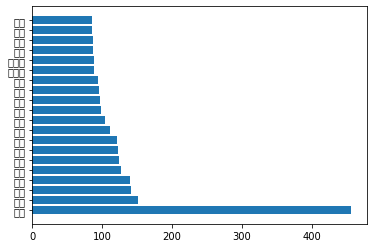

In [52]:
import matplotlib.pyplot as plt

plt.barh(sorted_df.head(20)["단어"], sorted_df.head(20)["빈도"])
plt.show()